In [1]:
import os
import time
import numpy as np
import pandas as pd

import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix

import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
     
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization

from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)
    
! for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done

a was unexpected at this time.


In [2]:
for dirname, _, filenames in os.walk("D:\schizophrenia_code\data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\schizophrenia_code\data\data_part1\columnLabels.csv
D:\schizophrenia_code\data\data_part1\demographic.csv
D:\schizophrenia_code\data\data_part1\ERPdata.csv
D:\schizophrenia_code\data\data_part1\mergedTrialData.csv
D:\schizophrenia_code\data\data_part1\time.csv
D:\schizophrenia_code\data\data_part1\1.csv\1.csv
D:\schizophrenia_code\data\data_part1\10.csv\10.csv
D:\schizophrenia_code\data\data_part1\11.csv\11.csv
D:\schizophrenia_code\data\data_part1\12.csv\12.csv
D:\schizophrenia_code\data\data_part1\13.csv\13.csv
D:\schizophrenia_code\data\data_part1\14.csv\14.csv
D:\schizophrenia_code\data\data_part1\15.csv\15.csv
D:\schizophrenia_code\data\data_part1\16.csv\16.csv
D:\schizophrenia_code\data\data_part1\17.csv\17.csv
D:\schizophrenia_code\data\data_part1\18.csv\18.csv
D:\schizophrenia_code\data\data_part1\19.csv\19.csv
D:\schizophrenia_code\data\data_part1\2.csv\2.csv
D:\schizophrenia_code\data\data_part1\20.csv\20.csv
D:\schizophrenia_code\data\data_part1\21.csv\21.csv
D:\schizophr

In [3]:
demographic = pd.read_csv("D:/schizophrenia_code/data/data_part1/demographic.csv")
demographic

,subject,group,gender,age,education
0,1,0,M,44,16.0
1,2,0,M,39,17.0
2,3,0,M,53,18.0
3,4,0,M,52,15.0
4,5,0,M,41,16.0
...,...,...,...,...,...
76,77,1,M,28,13.0
77,78,1,F,32,16.0
78,79,1,M,37,16.0
79,80,1,M,33,13.0


In [4]:
demographic[" group"].mean()

0.6049382716049383

In [5]:
demographic[" group"].value_counts()

 group
1    49
0    32
Name: count, dtype: int64

In [6]:
for i, t in enumerate(list(demographic[" group"])):
    if t:
        print(f"{i} - Schizophrenia")
    else:
        print(f"{i} - HEALTHY")

0 - HEALTHY
1 - HEALTHY
2 - HEALTHY
3 - HEALTHY
4 - HEALTHY
5 - HEALTHY
6 - HEALTHY
7 - HEALTHY
8 - HEALTHY
9 - HEALTHY
10 - HEALTHY
11 - HEALTHY
12 - HEALTHY
13 - HEALTHY
14 - HEALTHY
15 - HEALTHY
16 - HEALTHY
17 - HEALTHY
18 - HEALTHY
19 - HEALTHY
20 - HEALTHY
21 - HEALTHY
22 - HEALTHY
23 - HEALTHY
24 - Schizophrenia
25 - Schizophrenia
26 - Schizophrenia
27 - Schizophrenia
28 - Schizophrenia
29 - Schizophrenia
30 - Schizophrenia
31 - Schizophrenia
32 - Schizophrenia
33 - Schizophrenia
34 - Schizophrenia
35 - Schizophrenia
36 - Schizophrenia
37 - Schizophrenia
38 - Schizophrenia
39 - Schizophrenia
40 - Schizophrenia
41 - Schizophrenia
42 - Schizophrenia
43 - Schizophrenia
44 - Schizophrenia
45 - Schizophrenia
46 - Schizophrenia
47 - Schizophrenia
48 - Schizophrenia
49 - Schizophrenia
50 - Schizophrenia
51 - Schizophrenia
52 - Schizophrenia
53 - Schizophrenia
54 - Schizophrenia
55 - Schizophrenia
56 - Schizophrenia
57 - Schizophrenia
58 - HEALTHY
59 - HEALTHY
60 - HEALTHY
61 - HEALTHY


In [7]:
diagnosis_dict = dict(zip(demographic.subject, demographic[" group"]))
del demographic

In [8]:
electrodes_list = list(pd.read_csv("D:\schizophrenia_code\data\data_part1\columnLabels.csv").columns[4:])
print("Electrodes List \n",electrodes_list)

Electrodes List 
 ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'VEOa', 'VEOb', 'HEOL', 'HEOR', 'Nose', 'TP10']


                                                                               DATA PRE-PROCESSING

In [9]:
def averaged_by_N_rows(a, n):
    """ 
    A function that averages n rows in a matrix
    """
    shape = a.shape
    assert len(shape) == 2
    assert shape[0] % n == 0
    b = a.reshape(shape[0] // n, n, 
                  shape[1])
    mean_vec = b.mean(axis=1)
    return mean_vec

In [10]:
N_AVERAGED = 16
X = np.zeros((81 * 100,  9216 * len(electrodes_list) // N_AVERAGED), dtype="float32")
Y = np.zeros(len(X))

part1_path = "D:\schizophrenia_code\data\data_part1"
part2_path = "D:\schizophrenia_code\data\data_part2"

# We pull out only those experiments where there were 9216 measurements (most often named so many times)
x_counter = 0
column_list = pd.read_csv("D:\schizophrenia_code\data\data_part1\columnLabels.csv").columns
for person_number in tqdm(range(1, 81 + 1)):


    csv_path = f"{part1_path}/{person_number}.csv/{person_number}.csv"
    if not os.path.exists(csv_path):
        csv_path = f"{part2_path}/{person_number}.csv/{person_number}.csv"
    df = pd.read_csv(csv_path, 
                header=None,
                names=column_list)
    trials_list = set(df.trial)


    for t1, trial_number in enumerate(trials_list):
        number_of_trials = len(df[df.trial == trial_number])
        if number_of_trials == 9216.0:
            current_sample_matrix = df[df.trial == trial_number][electrodes_list].values
            averaged_by_N = averaged_by_N_rows(current_sample_matrix, n=N_AVERAGED)
            averaged_by_N_big_vec = averaged_by_N.reshape(-1)
            X[x_counter] = averaged_by_N_big_vec.astype(np.float32)
            Y[x_counter] = diagnosis_dict[person_number]
            x_counter += 1
print("Total trials with the Appropriate number of measurements - ", x_counter)
X = X[: x_counter]
Y = Y[: x_counter]
        
print("Total trials with the Appropriate number of measurements- ", x_counter)

  0%|          | 0/81 [00:00<?, ?it/s]

Total trials with the Appropriate number of measurements -  7092
Total trials with the Appropriate number of measurements-  7092


In [11]:
X.shape

(7092, 40320)

In [12]:
Y.shape

(7092,)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [14]:
X_norm = (normalize(X.reshape(-1, 70), axis=0, norm='max')).reshape(X.shape)

In [15]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm, Y, test_size=0.2, shuffle=True, random_state=42)

In [16]:
X_norm = X

In [17]:
X_train_2d = X_train_norm.reshape(X_train_norm.shape[0], len(electrodes_list), X_train_norm.shape[1] // len(electrodes_list), 1)
X_train_2D = X_train_2d.reshape(X_train_2d.shape[0], -1)
X_test_2d = X_test_norm.reshape(X_test_norm.shape[0], len(electrodes_list), X_test_norm.shape[1] // len(electrodes_list), 1)
X_test_2D = X_test_2d.reshape(X_test_2d.shape[0], -1)

In [ ]:
# from sklearn.decomposition import PCA

# # Create a PCA object with the desired number of components (features)
# n_components = 50  # Replace with the number of components you want
# pca = PCA(n_components=n_components)

# # Fit the PCA model to your data and transform the data
# X_train_pca = pca.fit_transform(X_train_2D)
# X_test_pca = pca.transform(X_test_2D)

# # Now, X_train_pca and X_test_pca contain the reduced-dimensional data

# # You can also access the explained variance ratio of each component
# explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from scipy.stats import uniform, randint

# # Define the hyperparameter search space
# param_dist = {
#     'C': uniform(loc=0, scale=10),  # Range of C values
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel choices
#     'degree': randint(2, 5),  # Degree of the polynomial kernel
#     'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Gamma values
# }

# # Create the SVM model
# svm = SVC()

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# # Perform the RandomizedSearchCV
# random_search.fit(X_train_pca, Y_train_norm)

# # Print the best hyperparameters and corresponding accuracy
# print("Best Hyperparameters:", random_search.best_params_)
# print("Best Accuracy:", random_search.best_score_)

                                                                              ML MODEL 1 : SUPPORT VECTOR MACHINE

In [18]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

svm_model = SVC(kernel='linear')

# Define a range of C values to test
C_values = [0.1, 1, 10, 100]  # You can adjust this list

accuracies = []
losses = []

for C in C_values:
    # Create and train the SVM model with the current C value
    # , gamma=1.5, degree=1, random_state=1
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train_2D, Y_train_norm)
    
    # Make predictions on the test data
    y_pred = svm_model.predict(X_test_2D)
    
    # Calculate accuracy
    accuracy = accuracy_score(Y_test_norm, y_pred)
    accuracies.append(accuracy)

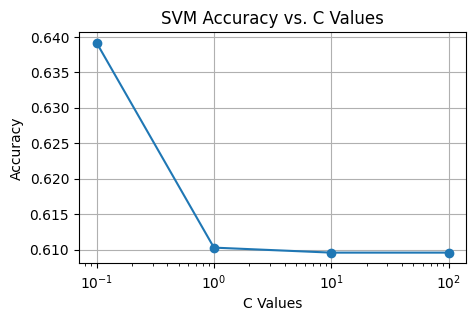

In [19]:
# Plot the accuracy graph
plt.figure(figsize=(5, 3))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')  # Logarithmic scale for C values, as C typically spans a wide range
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. C Values')
plt.grid(True)
plt.show()

In [20]:
max_accuracy = max(accuracies)*100
max_accuracy

63.918252290345315

In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1 score, precision and recall scores
f1_svm = f1_score(Y_test_norm, y_pred)
precision_svm = precision_score(Y_test_norm, y_pred)
recall_svm = recall_score(Y_test_norm, y_pred)

print("F1 Score_svm: {:.2f}".format(f1_svm))
print("Precision_svm: {:.2f}".format(precision_svm))
print("Recall_svm: {:.2f}".format(recall_svm))

F1 Score_svm: 0.67
Precision_svm: 0.67
Recall_svm: 0.67


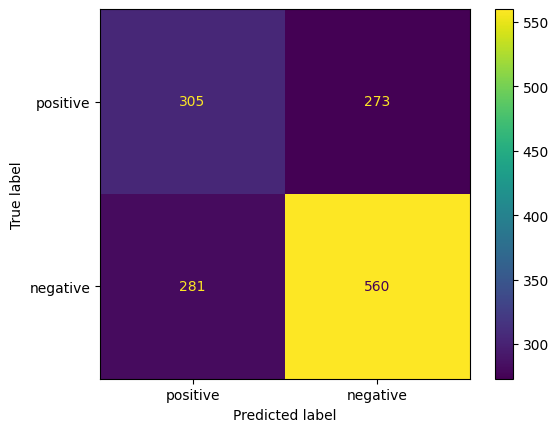

In [23]:
from sklearn import metrics
confusion_matr_svm = metrics.confusion_matrix(Y_test_norm, np.round(y_pred))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matr_svm, display_labels = ('positive', 'negative'))
cm_display.plot()
plt.show()

In [24]:
print(
    "True Positive for schizophrenia ", confusion_matr_svm[0, 0], "\n",
    "False Negative for schizophrenia ", confusion_matr_svm[0, 1], "\n",
    "False Positive For Healthy ", confusion_matr_svm[1, 0], "\n",
    "True Neagtive For Healthy ", confusion_matr_svm[1, 1], "\n")

True Positive for schizophrenia  305 
 False Negative for schizophrenia  273 
 False Positive For Healthy  281 
 True Neagtive For Healthy  560 



In [25]:
TP_svm = confusion_matr_svm[0, 0]
FN_svm = confusion_matr_svm[0, 1]
FP_svm = confusion_matr_svm[1, 0]
TN_svm = confusion_matr_svm[1, 1]
TP_svm, FP_svm, FN_svm, TN_svm

(305, 281, 273, 560)

In [26]:
sensitivity_svm = TP_svm / (TP_svm + FN_svm)
sensitivity_svm

0.527681660899654

In [27]:
specificity_svm = TN_svm / (TN_svm + FP_svm)
specificity_svm

0.6658739595719382

                                          ML MODEL 2 : RANDOM FOREST

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier

# Create arrays to store the accuracy values for test data
accuracy_values_RF = []

# Define a range of values for the number of trees (e.g., from 1 to 100)
num_trees_range = range(1, 101)

for num_trees in num_trees_range:
    # Create and train the Random Forest model with 'num_trees' trees
    random_forest_model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    random_forest_model.fit(X_train_2D, Y_train_norm)
    
    # Make predictions on the test data
    y_pred_RF = random_forest_model.predict(X_test_2D)
    # Calculate test accuracy and store it in the test_accuracy_values array
    accuracy_RF = accuracy_score(Y_test_norm, y_pred_RF)
    accuracy_values_RF.append(accuracy_RF)

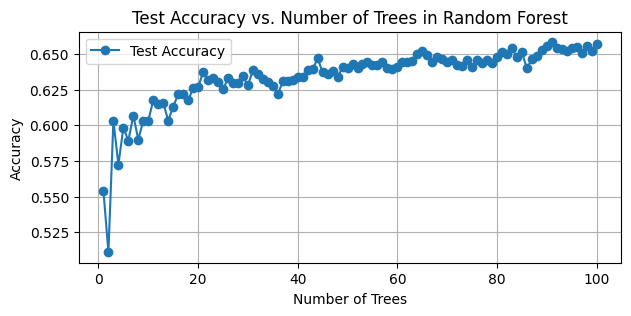

In [ ]:
# Plot the training and test accuracy values
plt.figure(figsize=(7, 3))
plt.plot(num_trees_range, accuracy_values_RF, label='Test Accuracy', marker='o', linestyle='-')
plt.title('Test Accuracy vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
max(accuracy_values_RF)*100

65.82100070472163

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1 score, precision and recall scores
f1_RF = f1_score(Y_test_norm, y_pred_RF)
precision_RF = precision_score(Y_test_norm, y_pred_RF)
recall_RF = recall_score(Y_test_norm, y_pred_RF)

print("F1 Score: {:.2f}".format(f1_RF))
print("Precision: {:.2f}".format(precision_RF))
print("Recall: {:.2f}".format(recall_RF))

F1 Score: 0.74
Precision: 0.67
Recall: 0.84


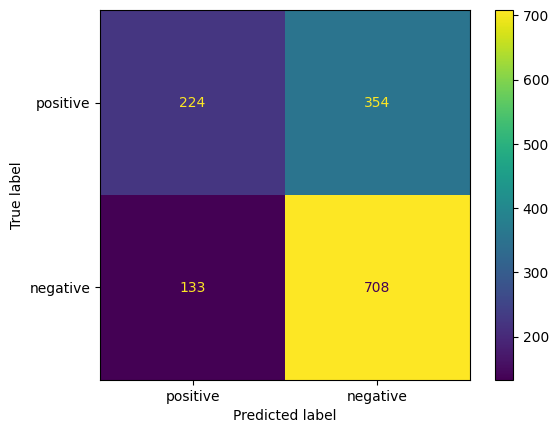

In [33]:
from sklearn import metrics
confusion_matr_RF = metrics.confusion_matrix(Y_test_norm, np.round(y_pred_RF))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matr_RF, display_labels=('positive','negative'))
cm_display.plot()
plt.show()

In [34]:
print(
    "True Positive for schizophrenia ", confusion_matr_RF[0, 0], "\n",
    "False Negative for schizophrenia ", confusion_matr_RF[0, 1], "\n",
    "False Positive For Healthy ", confusion_matr_RF[1, 0], "\n",
    "True Negative For Healthy ", confusion_matr_RF[1, 1], "\n")

True Positive for schizophrenia  224 
 False Negative for schizophrenia  354 
 False Positive For Healthy  133 
 True Negative For Healthy  708 



In [35]:
TP_RF = confusion_matr_RF[0, 0]
FN_RF = confusion_matr_RF[0, 1]
FP_RF = confusion_matr_RF[1, 0]
TN_RF = confusion_matr_RF[1, 1]
TP_RF, FP_RF, FN_RF, TN_RF

(224, 133, 354, 708)

In [36]:
sensitivity_RF = TP_RF / (TP_RF + FN_RF)
sensitivity_RF

0.3875432525951557

In [37]:
specificity_RF = TN_RF / (TN_RF + FP_RF)
specificity_RF

0.8418549346016647

                                                 ML MODEL 4 : KNN

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier

# Initialize arrays to store accuracy values for different 'k' values
accuracies_knn = []
k_values = range(1, 21)  # A range of 'k' values to explore

# Loop through different 'k' values
for k in k_values:
    # Initialize the KNN model with the current 'k'
    model_knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    
    # Train the model on the training data
    model_knn.fit(X_train_2D, Y_train_norm)
    
    # Make predictions on the test data
    y_pred_knn = model_knn.predict(X_test_2D)
    
    # Calculate accuracy and store it in the accuracies array
    accuracy_knn = accuracy_score(Y_test_norm, y_pred_knn)
    accuracies_knn.append(accuracy_knn)

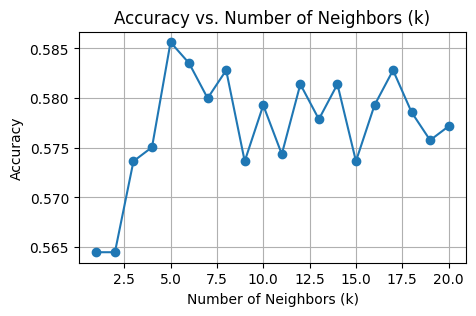

In [ ]:
# Plot the accuracy graph
plt.figure(figsize=(5, 3))
plt.plot(k_values, accuracies_knn, marker='o')
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
max(accuracies_knn)*100

58.56236786469344

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Calculate F1 score, precision and recall scores
f1_knn = f1_score(Y_test_norm, y_pred_knn)
precision_knn = precision_score(Y_test_norm, y_pred_knn)
recall_knn = recall_score(Y_test_norm, y_pred_knn)

print("F1 Score: {:.2f}".format(f1_knn))
print("Precision: {:.2f}".format(precision_knn))
print("Recall: {:.2f}".format(recall_knn))

F1 Score: 0.71
Precision: 0.60
Recall: 0.88


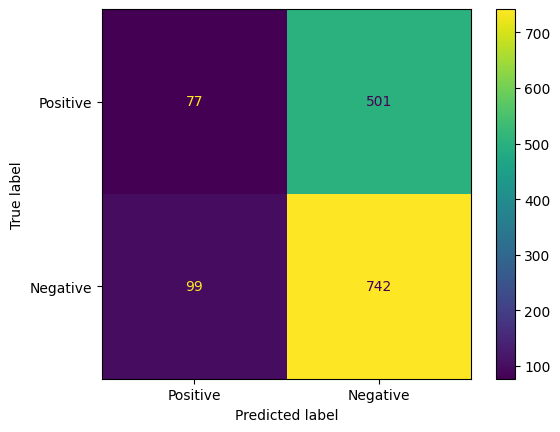

In [41]:
from sklearn import metrics
confusion_matr_knn = confusion_matrix(Y_test_norm, np.round(y_pred_knn))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matr_knn, display_labels = ('Positive','Negative'))
cm_display.plot()
plt.show()

In [42]:
print(
    "True Positive for schizophrenia ", confusion_matr_knn[0, 0], "\n",
    "False Negative for schizophrenia ", confusion_matr_knn[0, 1], "\n",
    "False Positive For Healthy ", confusion_matr_knn[1, 0], "\n",
    "True Neagtive For Healthy ", confusion_matr_knn[1, 1], "\n")

True Positive for schizophrenia  77 
 False Negative for schizophrenia  501 
 False Positive For Healthy  99 
 True Neagtive For Healthy  742 



In [43]:
TP_knn = confusion_matr_knn[0, 0]
FN_knn = confusion_matr_knn[0, 1]
FP_knn = confusion_matr_knn[1, 0]
TN_knn= confusion_matr_knn[1, 1]
TP_knn, FP_knn, FN_knn, TN_knn

(77, 99, 501, 742)

In [44]:
sensitivity_knn = TP_knn / (TP_knn + FN_knn)
sensitivity_knn

0.13321799307958476

In [45]:
specificity_knn = TN_knn / (TN_knn + FP_knn)
specificity_knn

0.882282996432818